# Tumor Classification

<a target="_blank" href="https://colab.research.google.com/github/LuisAngelMendozaVelasco/luisangelmendozavelasco.github.io/blob/master/_portfolio/IBM_AI_Engineering/portfolio-8.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>

**Objective**: Build and train a model to classify human cells samples as benign or malignant.

[Support Vector Machine (SMV)](https://en.wikipedia.org/wiki/Support_vector_machine) is a type of supervised learning algorithm used for classification and regression tasks. It’s a powerful and widely used machine learning technique, particularly effective in handling high-dimensional spaces and non-linear relationships between features.

## Import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

## Load the dataset

In [2]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/cell_samples.csv"
df = pd.read_csv(file_url)
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## Understand the dataset

The dataset consists of several hundred human cell sample records, each of which contains the values of a set of cell characteristics. The fields in each record are:

|  Field name |         Description         |
|:-----------:|:---------------------------:|
| ID          | Patient identifier          |
| Clump       | Clump thickness             |
| UnifSize    | Uniformity of cell size     |
| UnifShape   | Uniformity of cell shape    |
| MargAdh     | Marginal adhesion           |
| SingEpiSize | Single epithelial cell size |
| BareNuc     | Bare nuclei                 |
| BlandChrom  | Bland chromatin             |
| NormNucl    | Normal nucleoli             |
| Mit         | Mitoses                     |
| Class       | Benign or malignant         |

The  `ID` field contains the patient identifiers. The characteristics of each patient's cell samples are contained in the fields `Clump` to `Mit`. Values are ranked from 1 to 10, with 1 being closest to benign.

The `Class` field contains the diagnosis, samples are benign (value = 2) or malignant (value = 4).

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           699 non-null    int64 
 1   Clump        699 non-null    int64 
 2   UnifSize     699 non-null    int64 
 3   UnifShape    699 non-null    int64 
 4   MargAdh      699 non-null    int64 
 5   SingEpiSize  699 non-null    int64 
 6   BareNuc      699 non-null    object
 7   BlandChrom   699 non-null    int64 
 8   NormNucl     699 non-null    int64 
 9   Mit          699 non-null    int64 
 10  Class        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


## Preprocess the dataset

Drop rows that contain NaN values and the `ID` field:

In [4]:
original_size = df.size
df = df[pd.to_numeric(df['BareNuc'], errors='coerce').notnull()].drop("ID", axis=1)
df['BareNuc'] = df['BareNuc'].astype('int')
cleaned_size = df.size
print("The dataset was reduced by {:.2f}%".format((1 - cleaned_size / original_size)*100))

The dataset was reduced by 11.17%


## Visualize the dataset

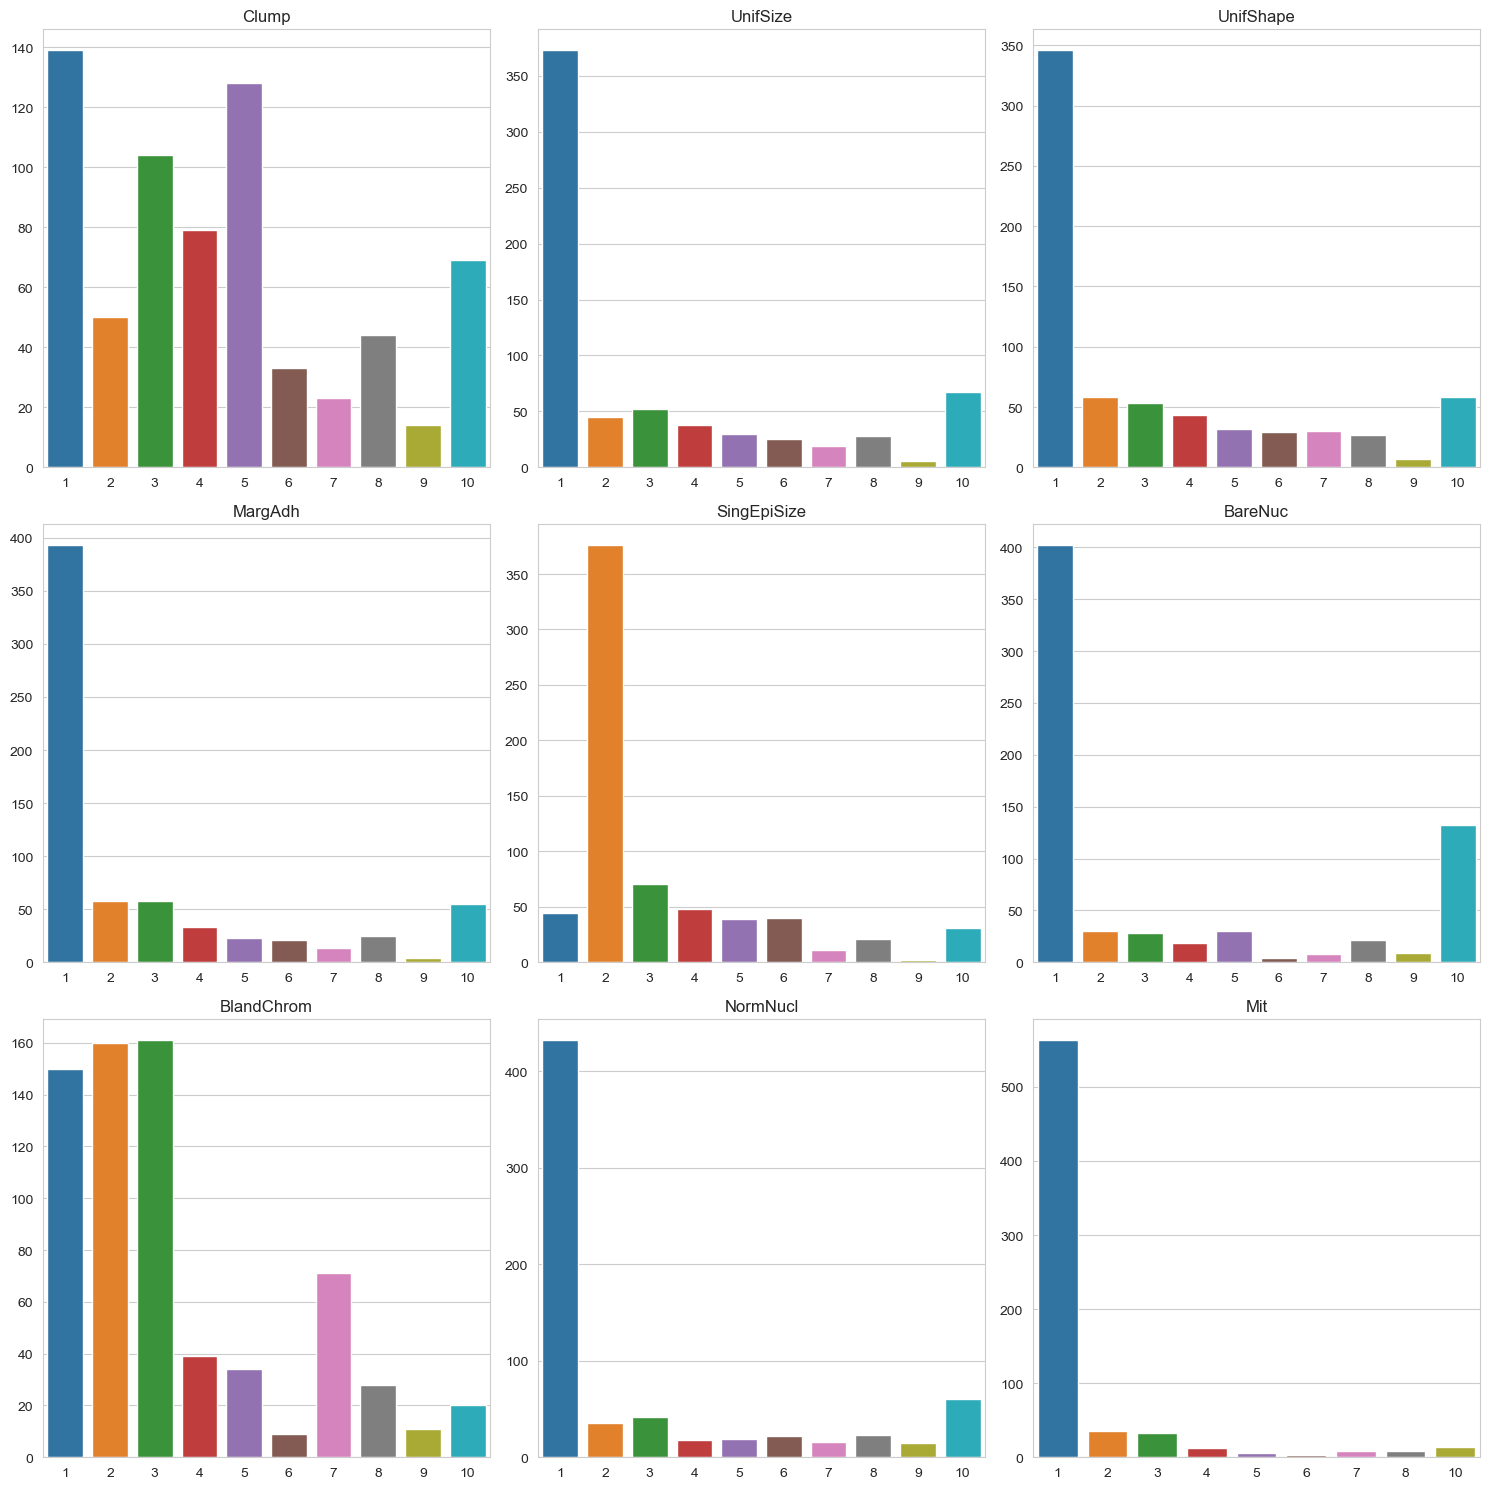

In [5]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

for ax, feature in zip(axs.flatten(), df.columns):
    if len(df[feature].unique()) <= 10:
        labels, sizes = np.unique(df[feature], return_counts=True)
        sns.barplot(x=labels, y=sizes, hue=labels, ax=ax, palette="tab10", legend=False)
        ax.set_xlabel("")
        ax.set_title(feature)
    else:
        sns.histplot(data=df, x=feature, ax=ax)
        ax.set_xlabel("")
        ax.set_title(feature)

plt.tight_layout()
plt.show()

## Visualize the class distribution

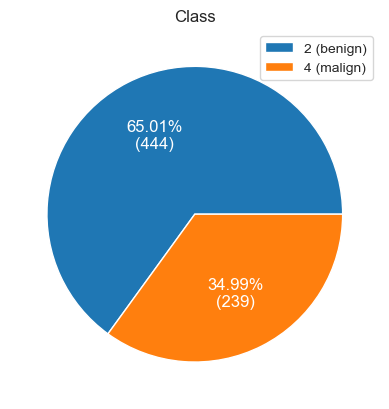

In [6]:
labels, sizes = np.unique(df["Class"], return_counts=True)

fig, ax = plt.subplots()
ax.pie(sizes, textprops={'color': "w", 'fontsize': '12'}, autopct=lambda pct: "{:.2f}%\n({:d})".format(pct, round(pct/100 * sum(sizes))))
ax.legend(["2 (benign)" if key==2 else "4 (malign)" for key in labels])
ax.set_title("Class")
plt.show()

## Split the dataset into train and test subsets

In [7]:
X = df.drop("Class", axis=1)
y = df["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (512, 9)
X_test shape: (171, 9)


## Train a Support Vector Classifier

In [8]:
classifier = SVC()
classifier.fit(X_train, y_train) 

SVC()

## Evaluate the model

              precision    recall  f1-score   support

           2     0.9714    0.9533    0.9623       107
           4     0.9242    0.9531    0.9385        64

    accuracy                         0.9532       171
   macro avg     0.9478    0.9532    0.9504       171
weighted avg     0.9538    0.9532    0.9534       171



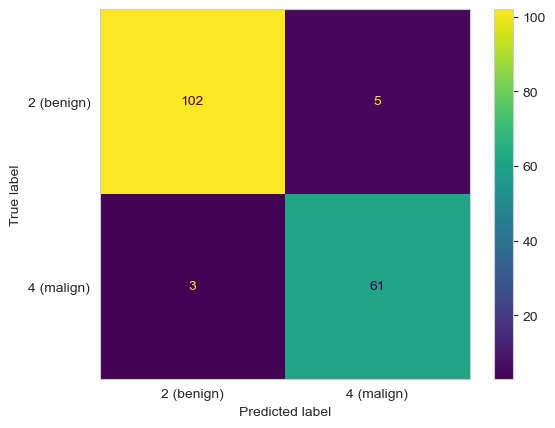

In [9]:
y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["2 (benign)", "4 (malign)"])
plt.grid(False)
plt.show()